## Data description and exploration

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

### Description of the data
 The dataset contains two month information about Uber and Lyft rides. It consists of geographical, time, weather and ride properties of provided services. The detailed description of features can be found in the categories of feature section. The following EDA is performed to better understand data and its suitability for prediction of fair taxi prices.

In [5]:
data= pd.read_csv('../data/samples/sample.csv')
data.head(6)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
5  f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2  1.545071e+09    18   17     12   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   
5  2018-12-17 18:25:12  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   
5     Lyft  ...             0.0221  1545066000           34.19   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   
5          1545048000           40.66          1545022800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   
5                   27.39                  1545044400                   34.97   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  
5                 1545080400  

[6 rows x 57 columns]

### The quantity of the data
The dataset contains 138614 records and 57 columns.

In [6]:
print(f"The number of rows in the dataset is: {data.shape[0]} and number of columns is: {data.shape[1]}")
print(f"The column names are: {list(data.columns)}")

The number of rows in the dataset is: 138614 and number of columns is: 57
The column names are: ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax',

### The data types of the features

In [7]:
print("The data types of the features are:")
print(data.info())

The data types of the features are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138614 entries, 0 to 138613
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           138614 non-null  object 
 1   timestamp                    138614 non-null  float64
 2   hour                         138614 non-null  int64  
 3   day                          138614 non-null  int64  
 4   month                        138614 non-null  int64  
 5   datetime                     138614 non-null  object 
 6   timezone                     138614 non-null  object 
 7   source                       138614 non-null  object 
 8   destination                  138614 non-null  object 
 9   cab_type                     138614 non-null  object 
 10  product_id                   138614 non-null  object 
 11  name                         138614 non-null  object 
 12  price                 

### Unique values in the features

In [8]:
feature_unique_values_df = pd.DataFrame(columns = ['feature name', 'number of unique values'])

for column in data.columns:
    feature_unique_values_df.loc[len(feature_unique_values_df)] = [column, data[column].nunique()]
print(feature_unique_values_df)

                   feature name  number of unique values
0                            id                   138614
1                     timestamp                    36164
2                          hour                       24
3                           day                       17
4                         month                        2
5                      datetime                    31350
6                      timezone                        1
7                        source                       12
8                   destination                       12
9                      cab_type                        2
10                   product_id                       13
11                         name                       13
12                        price                      125
13                     distance                      512
14             surge_multiplier                        7
15                     latitude                       11
16                    longitude

### Categories of feature types
**Numerical features:**

| Feature name | Datatype | Description |
| --- | --- | --- |
| id | object | Unique Identifier for each record |
| hour | int64 | The hour of the day when the ride happened |
| day | int64 | The day of the month when the ride happened |
| month | int64 | The month when the ride happened. |
| distance | float64 | The total distance of the requested ride |
| surge_multiplier | float64 | The surge pricing multiplier applied to the transaction |
| latitude | float64 | The latitude coordinate of the transaction location |
| longitude | float64 | The longitude coordinate of the transaction location |
| temperature | float64 | The temperature at the time and location of the ride |
| apparentTemperature | float64 | The perceived temperature at the time and location of the ride |
| precipIntensity | float64 | The intensity of precipitation at the time of the ride |
| precipProbability | float64 | The probability of precipitation at the time of the ride |
| humidity | float64 | The humidity level at the time of the ride |
| windSpeed | float64 | The wind speed at the time of the ride |
| windGust | float64 | The wind gust speed at the time of the ride. |
| visibility | float64 | The visibility level at the time of the transaction |
| temperatureHigh | float64 | The highest temperature recorded at the time of the ride |
| temperatureLow | float64 | The lowest temperature recorded at the time of the ride. |
| apparentTemperatureHigh | float64 | The highest perceived temperature recorded at the time of the ride |
| apparentTemperatureLow | float64 | The lowest perceived temperature recorded at the time of the ride |
| dewPoint | float64 | The dew point at the time of the transaction |
| pressure | float64 | The atmospheric pressure at the time of the ride |
| windBearing | int64 | The direction of the wind at the time of the ride |
| cloudCover | float64 | The cloud cover percentage at the time of the transaction |
| uvIndex | int64 | he UV index at the time of the transaction |
| visibility.1 | float64 | Visibility measurement at the time of the transaction (duplicate of visibility column) |
| ozone | float64 | The ozone level at the time of the ride |
| moonPhase | float64 | The phase of the moon on the day of the ride |
| precipIntensityMax | float64 | The maximum precipitation intensity at the time of the ride. |
| temperatureMin | float64 | The minimum temperature recorded at the time of the ride. |
| temperatureMax | float64 | The maximum temperature recorded at the time of the ride |
| apparentTemperatureMin | float64 | The minimum perceived temperature recorded at the time of the ride |
| apparentTemperatureMax | float64 | The maximum perceived temperature recorded at the time of the ride |


**Categorical features**:

| Feature name | Datatype | Description |
| --- | --- | --- |
| cab type | object | The type of taxi company (Uber or Lyft) |
| name | object | Category of taxi ride |
| product_id | object | Id of the category of taxi ride |
| icon | float64 | An icon representing the weather condition at the time of the ride |
| timezone | object | The timezone in which the ride happened
 |

 **Text features**:

 | Feature name | Datatype | Description |
| --- | --- | --- |
| source | object | The start point of the ride |
| destination | object | The end point of the ride |
| short_summary | object | A brief weather summary at the time of the ride |
| long_summary | object | A detailed weather summary at the time of the transaction
 |

 **Time features**:

 | Feature name | Datatype | Description |
| --- | --- | --- |
| datetime | object | The date of the ride|
| windGustTime | int64 | The time when the wind gust occurred |
| temperatureHighTime | int64 | The time when the highest temperature was recorded |
| temperatureLowTime | int64 | The time when the lowest temperature was recorded |
| apparentTemperatureHighTime | int64 | The time when the highest perceived temperature was recorded |
| apparentTemperatureLowTime | int64 | The time when the lowest perceived temperature was recorded |
| sunriseTime | int64 | The time of sunrise on the day of the transaction |
| sunsetTime | int64 | The time of sunset on the day of the ride |
| uvIndexTime | int64 | The time when the UV index was recorded |
| temperatureMinTime | int64 | The time when the minimum temperature was recorded. |
| temperatureMaxTime | int64 | The time when the maximum temperature was recorded |
| apparentTemperatureMinTime | int64 | The time when the minimum perceived temperature was recorded |
| apparentTemperatureMaxTime | int64 | The time when the maximum perceived temperature was recorded |


### Data Cleaning

#### Duplicates cleaning

In [9]:
# check for duplicates
print(f"Number of duplicated rows in the dataset is: {data.duplicated().sum()}")


Number of duplicated rows in the dataset is: 0


We noticed two columns that represent visibility. Therefore, the check is needed to understand if they are the same or not.

In [10]:
# check visibility and visibility1 columns for duplicates

is_column_duplicated = data['visibility'].equals(data['visibility.1'])
print(is_column_duplicated)
print(data[['visibility', 'visibility.1']].head())


True
   visibility  visibility.1
0      10.000        10.000
1       4.786         4.786
2      10.000        10.000
3      10.000        10.000
4      10.000        10.000


In [11]:
# remove visibility1 column as a duplicate
data = data.drop(['visibility.1'], axis = 1)

Some records have no price. We cannot impute it because it is the target column, therefore we should remove these rows.

In [12]:
# check for missing values
# Find the columns with missing values
missing_values_columns = list(data.columns[data.isnull().any()])
print('Columns with missing values: ', missing_values_columns)

Columns with missing values:  ['price']


In [13]:
# remove missing values - irrelevant observations
print(f"Number of rows with missing price: {data['price'].isnull().sum()}")
data = data.dropna(subset=['price'])
print(f"Number of rows with missing price (after removing): {data['price'].isnull().sum()}")

Number of rows with missing price: 10992
Number of rows with missing price (after removing): 0


For each weather measurement there is column with the corresponding time of the measurement. Thus, it is essential to check if the time of the measurement is close to the time of the ride. If the time difference is more than an hour, the measurement is not relevant.

In [14]:
# check the times
features_time = []
for column in data.columns:
    if ('time'  in column or 'Time'  in column):
        features_time.append(column)
print(features_time)

['timestamp', 'datetime', 'timezone', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']


In [15]:
# check the difference between current time (time of the ride) and time of the measurements of the weather
features_time.remove('timestamp')
features_time.remove('datetime')
features_time.remove('timezone')
time_difference_df = pd.DataFrame()
print(type(data['datetime'][0]))
print(type(data['temperatureHighTime'][0]))
for feature in features_time:
    time_difference_df[feature] = abs(pd.to_datetime(data[feature]) - pd.to_datetime(data['timestamp'])).dt.total_seconds()
time_difference_df

<class 'str'>
<class 'numpy.int64'>


windGustTime  temperatureHighTime  temperatureLowTime  \
0           0.000063             0.000016            0.000095   
1           0.000007             0.000032            0.000014   
2           0.000032             0.000047            0.000036   
3           0.000039             0.000043            0.000026   
4           0.000017             0.000043            0.000015   
...              ...                  ...                 ...   
138609      0.000021             0.000039            0.000061   
138610      0.000021             0.000039            0.000061   
138611      0.000021             0.000039            0.000061   
138612      0.000021             0.000039            0.000061   
138613      0.000012             0.000034            0.000024   

        apparentTemperatureHighTime  apparentTemperatureLowTime  sunriseTime  \
0                          0.000016                    0.000092     0.000009   
1                          0.000032                    0.000007     0.000051   
2                          0.000047                    0.000025     0.000047   
3                          0.000043                    0.000022     0.000061   
4                          0.000043                    0.000003     0.000057   
...                             ...                         ...          ...   
138609                     0.000039                    0.000061     0.000014   
138610                     0.000039                    0.000061     0.000014   
138611                     0.000039                    0.000061     0.000014   
138612                     0.000039                    0.000061     0.000014   
138613                     0.000034                    0.000024     0.000055   

        sunsetTime  uvIndexTime  temperatureMinTime  temperatureMaxTime  \
0         0.000042     0.000027            0.000059            0.000016   
1         0.000017     0.000032            0.000050            0.000032   
2         0.000013     0.000029            0.000011            0.000047   
3         0.000027     0.000046            0.000003            0.000043   
4         0.000024     0.000043            0.000061            0.000043   
...            ...          ...                 ...                 ...   
138609    0.000047     0.000032            0.000010            0.000039   
138610    0.000047     0.000032            0.000010            0.000039   
138611    0.000047     0.000032            0.000010            0.000039   
138612    0.000047     0.000032            0.000010            0.000039   
138613    0.000022     0.000037            0.000001            0.000034   

        apparentTemperatureMinTime  apparentTemperatureMaxTime  
0                         0.000059                    0.000005  
1                         0.000007                    0.000032  
2                         0.000011                    0.000047  
3                         0.000003                    0.000043  
4                         0.000071                    0.000043  
...                            ...                         ...  
138609                    0.000010                    0.000039  
138610                    0.000010                    0.000039  
138611                    0.000010                    0.000039  
138612                    0.000010                    0.000039  
138613                    0.000001                    0.000034  

[127622 rows x 12 columns]

In [16]:
if (time_difference_df > 3600).any().any():
    print("There is a time difference of more than an hour.")
else:
    print("There is no time difference of more than an hour.")

There is no time difference of more than an hour.


Since the time of all measurements is very close to the time of travel, we can delete the features related to time of measurements.

In [17]:
data = data.drop(['windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis = 1)
print(f"Columns left: {list(data.columns)}")

Columns left: ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


Short summary column is brief version of long summary one. Therefore it is a duplicate and we should remove it.

In [18]:
data = data.drop(['long_summary'], axis = 1)
print(f"Left columns: {list(data.columns)}")
print(len(data.columns))

Left columns: ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']
43


#### Domain knowledge
According to the context of the problems, some features can be deleted:
- Price of the ride is not affected by id, because it just uniquely identifies the rides. Therefore it can be deleted.
- Timezone feature has only 1 value as it should be, because the goal of the project is to only predict cab prices in Boston, so this column is also useless.
- Icon is just an image representation of the weather, so it can be deleted (the weather itself will be counted in other features).
- The price of the ride is not influenced by the moon phase, therefore it is reasonable to delete it.
- The ozone level also is not relevant feature for the price prediction.

The dataset also has many of the same features related to coordinates and weather. In future data processing steps, some of these will also be removed from consideration


In [19]:
data = data.drop(['id', 'timezone', 'icon', 'moonPhase', 'ozone'], axis = 1)
print(len(data.columns))

38


Instead of using datetime, we can extract the day of the week from it and use it as a feature. It can be useful because the day of week feature captures patterns related to human behavior, which can significantly influence taxi demand and pricing.

In [20]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['day_of_week'] = data['datetime'].dt.dayofweek
print(data['day_of_week'].head())
data = data.drop(['datetime', 'day'], axis = 1)
print(len(data.columns))

0    6
1    1
2    2
3    4
4    3
Name: day_of_week, dtype: int32
37


The temperature is represented as minimum, maximum and apparent temperature. These features can be highly correlated, therefore we should leave one of them that is the most informative.

In [21]:
# plot max, min amd apparent temperature
temp_features = []
for column in data.columns:
    if ('temperature' in column or 'Temperature' in column) and 'time' not in column and 'Time' not in column:
        temp_features.append(column)
print(temp_features)

['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


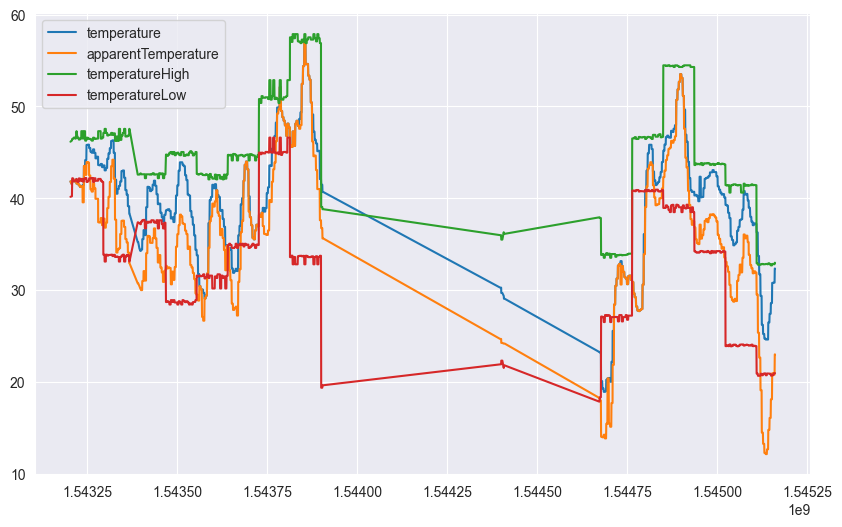

In [22]:
# sample 10 data points to investigate the temperature features
n = 10
sampled_data = data[::n]
sampled_data = sampled_data.sort_values(by='timestamp')


plt.figure(figsize=(10, 6))
plt.plot(sampled_data['timestamp'], sampled_data['temperature'], label='temperature')
plt.plot(sampled_data['timestamp'], sampled_data['apparentTemperature'], label='apparentTemperature')
plt.plot(sampled_data['timestamp'], sampled_data['temperatureHigh'], label='temperatureHigh')
plt.plot(sampled_data['timestamp'], sampled_data['temperatureLow'], label='temperatureLow')

plt.legend()
plt.show()


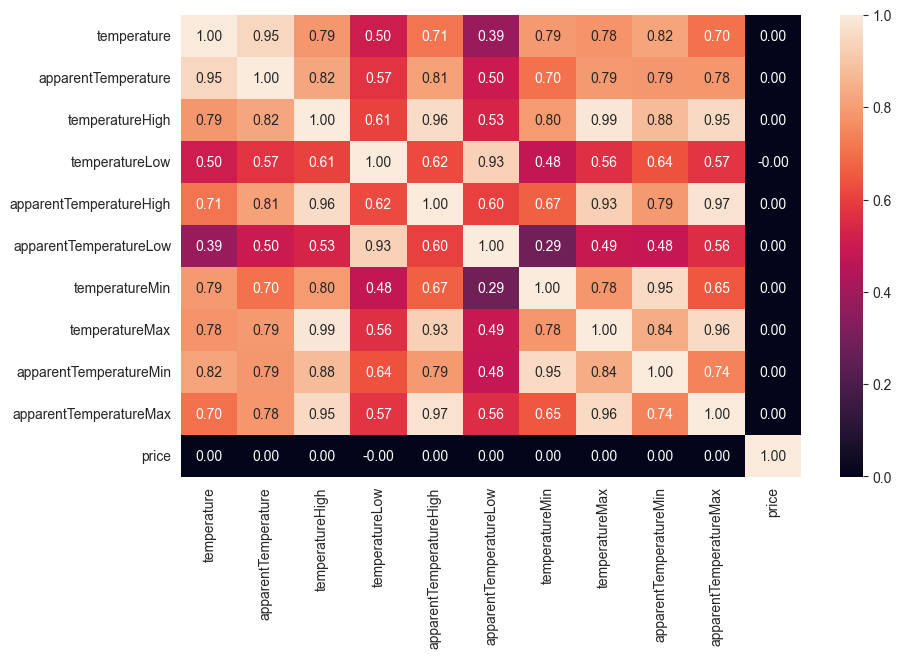

In [23]:
# plot the correlation matrix
features = temp_features + ['price']
plt.figure(figsize=(10, 6))
sns.heatmap(data[features].corr(), annot=True, fmt='.2f')
plt.show()


From the plot we can see that the apparent temperature behaves similarly to the temperature. Therefore, based on the plot and understanding that apparent temperature matters more in real life than the actual temperature, we can leave only the apparent temperature feature. TemperatureHigh and TemperatureLow are also highly correlated with the apparent temperature, so we can remove them (they just give bounds, apparent temperature mostly lies between them).

Moreover, from the correlation matrix we can see that the temperature features and the price are not correlated. From the real life, the price can be affected by temperature because when its too hot or too cold people prefer taxi instead of walking or using public transport. Since data has only information about 2 month (November and December), it will be better to leave the apparent temperature. May be during another months the price can be affected by temperature.

In [24]:
# delete similar features related to temperature, leave apparentTemperature

data = data.drop(['temperature', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'], axis = 1)
print(f"Left columns: {list(data.columns)}")
print(len(data.columns))

Left columns: ['timestamp', 'hour', 'month', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'day_of_week']
28


cab_type
Uber    66029
Lyft    61593
Name: count, dtype: int64


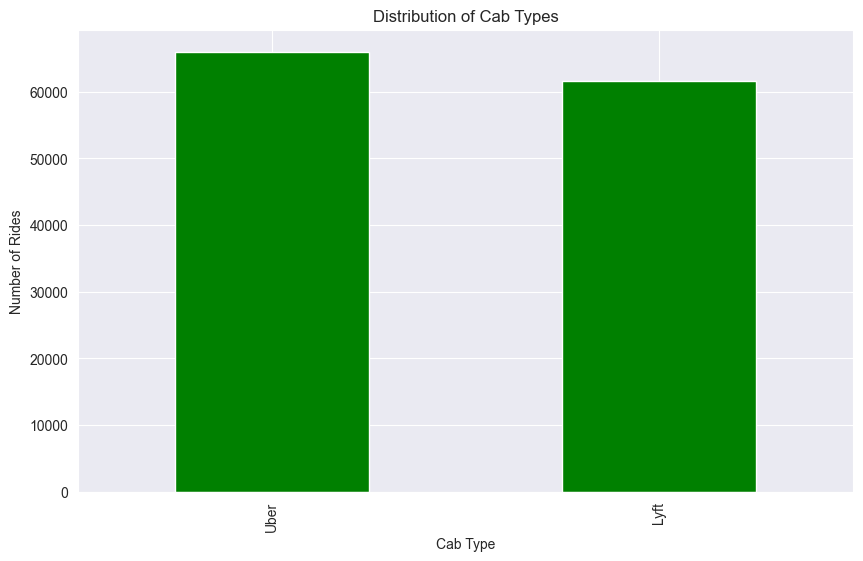

In [25]:
# cab type distribution
print(data['cab_type'].value_counts())
plt.figure(figsize=(10, 6))
data['cab_type'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Number of Rides')
plt.show()


In [26]:
# delete column cab type
data = data.drop(['cab_type'], axis = 1)
print(f"Left columns: {list(data.columns)}")
print(len(data.columns))

Left columns: ['timestamp', 'hour', 'month', 'source', 'destination', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'day_of_week']
27


### The distribution of each data feature and the target

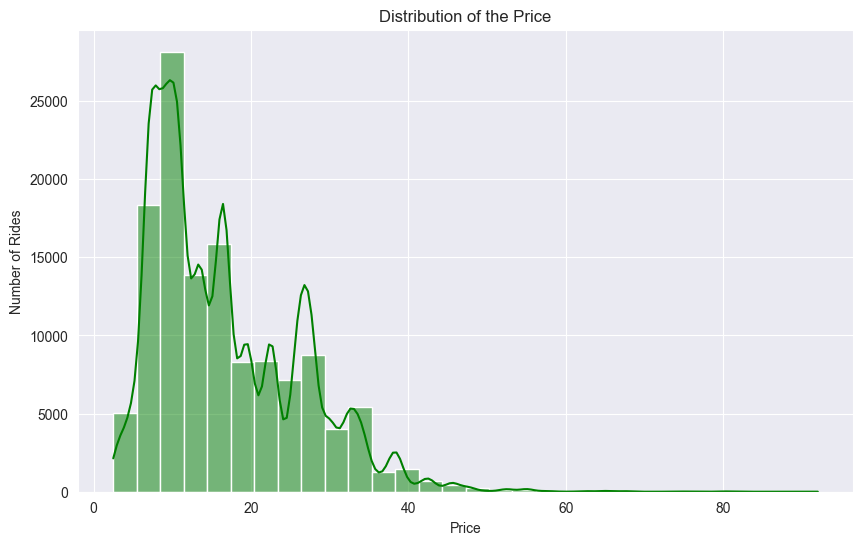

In [27]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True, color='green')
plt.title('Distribution of the Price')
plt.xlabel('Price')
plt.ylabel('Number of Rides')
plt.show()

#### Features and the target relations

In [28]:
numerical_features = ['timestamp', 'hour', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax']
categorical_features = ['source', 'destination', 'product_id', 'name', 'short_summary', 'day_of_week']

According to the 

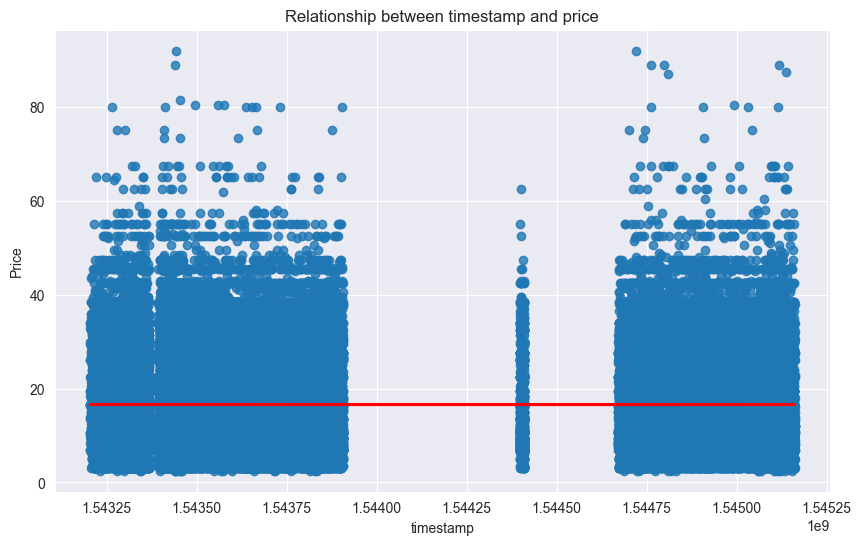

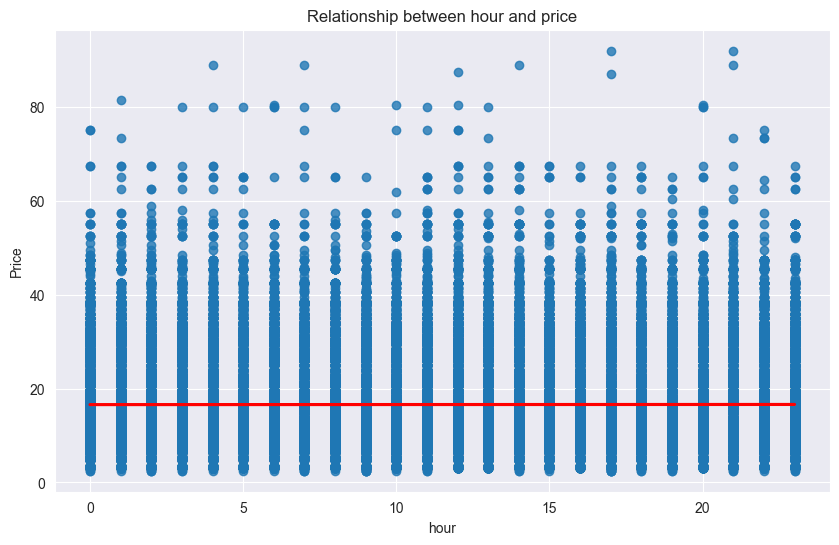

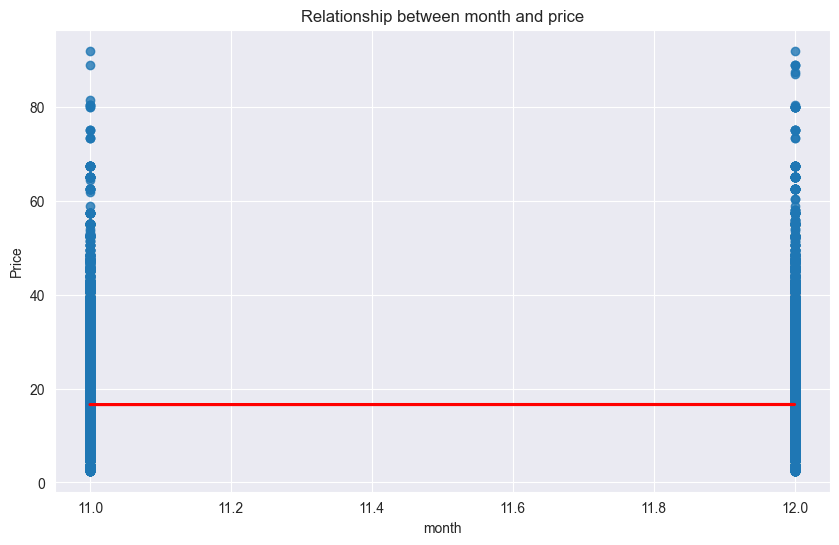

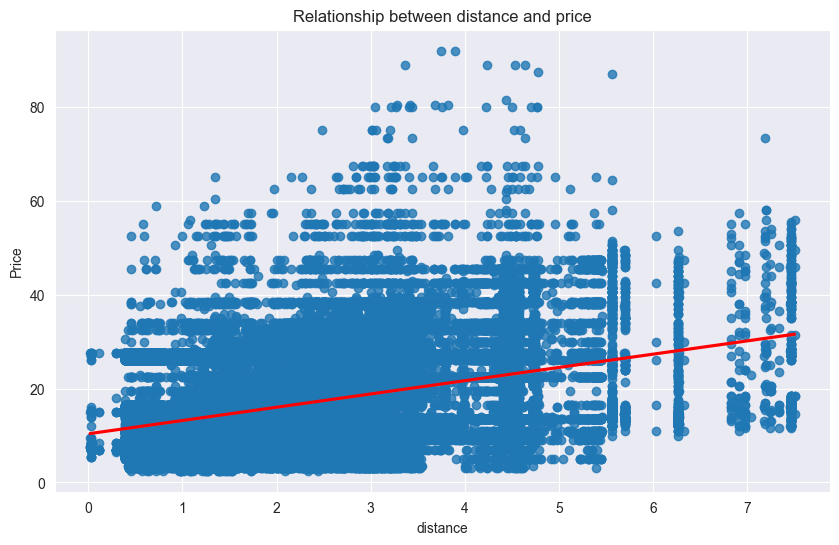

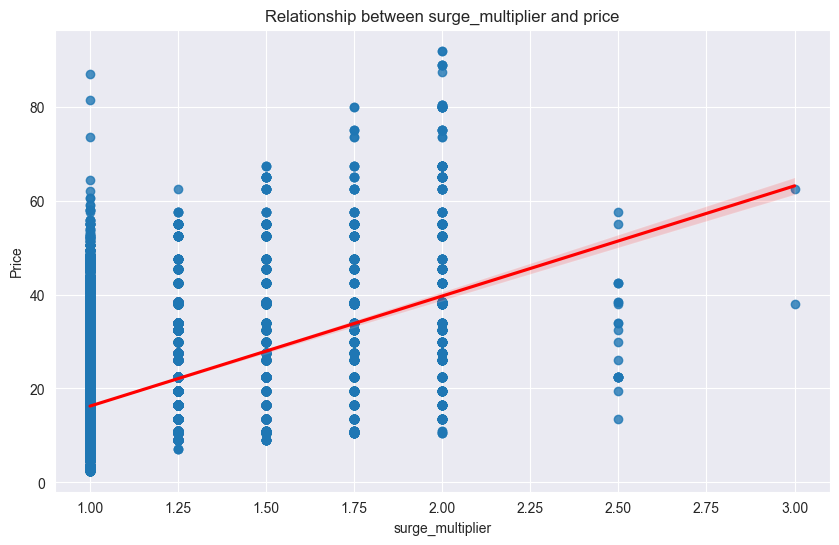

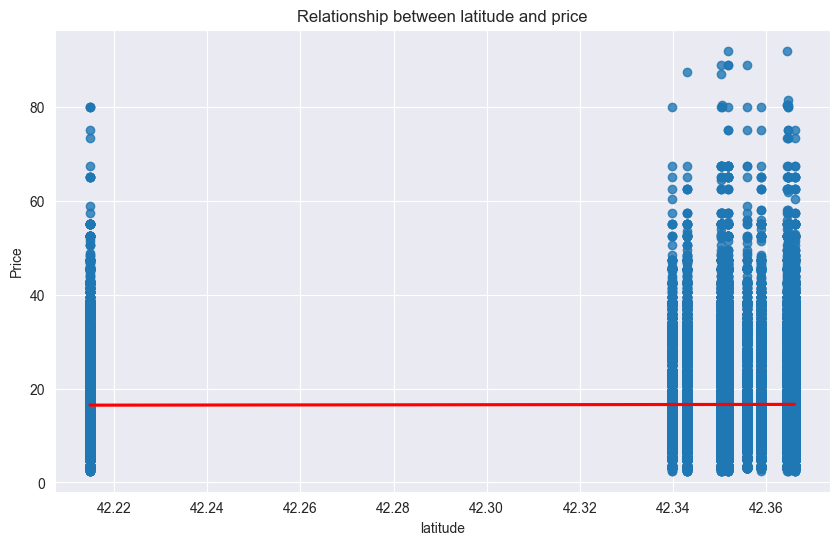

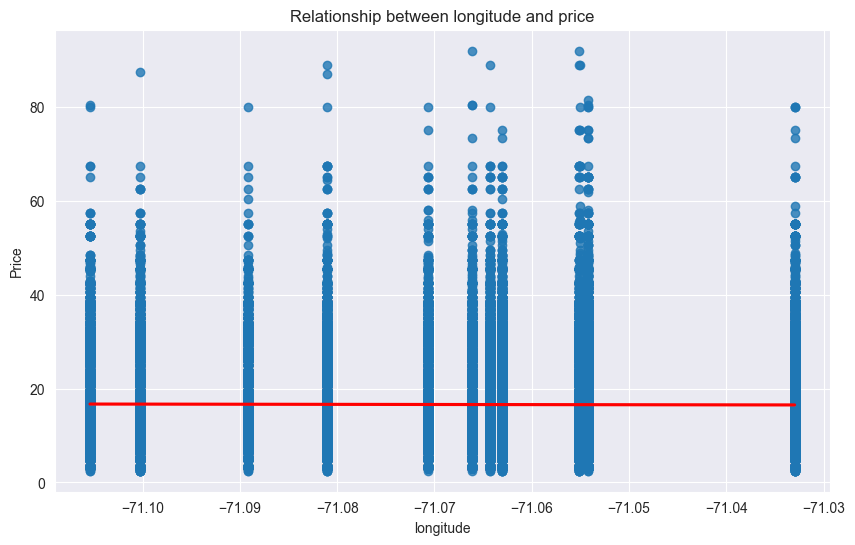

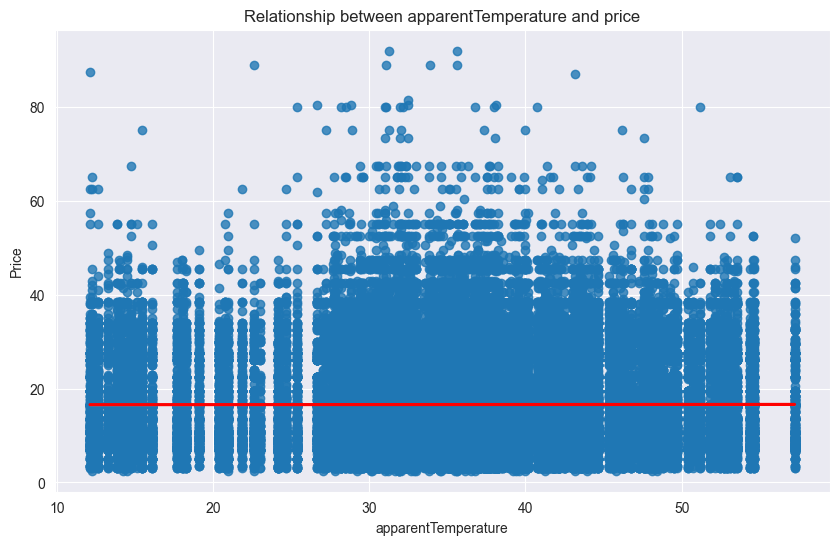

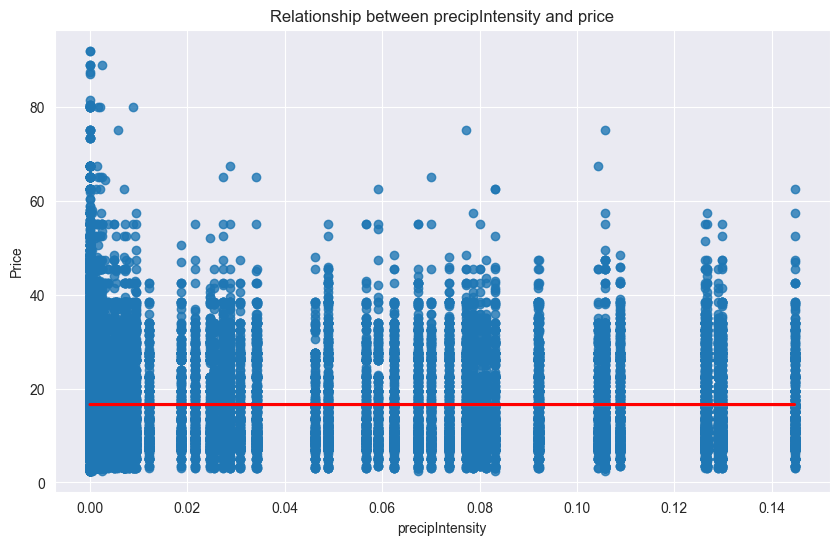

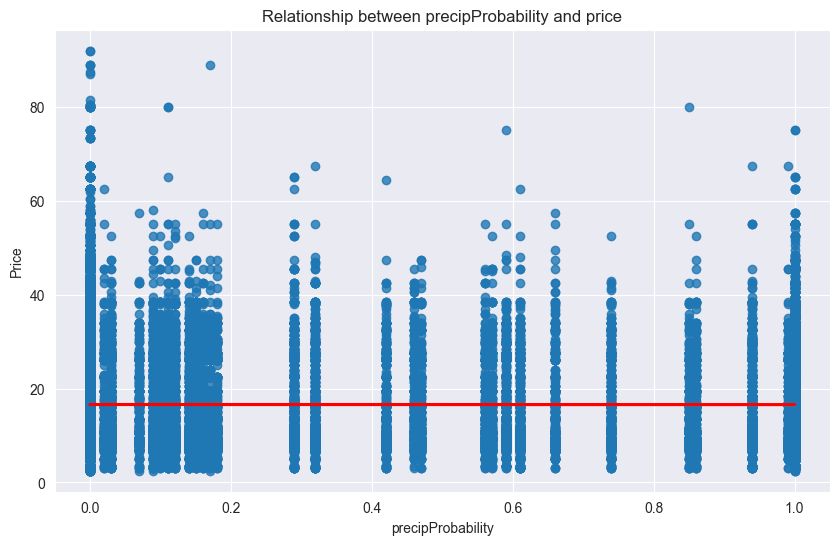

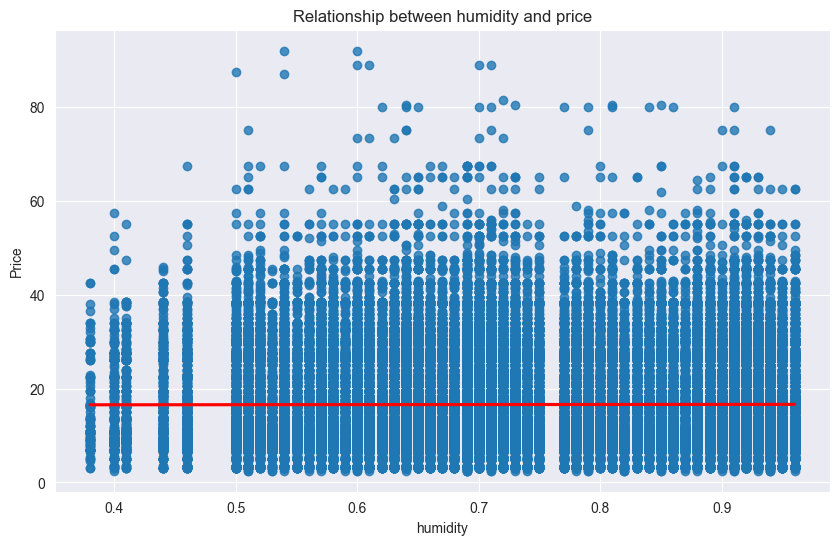

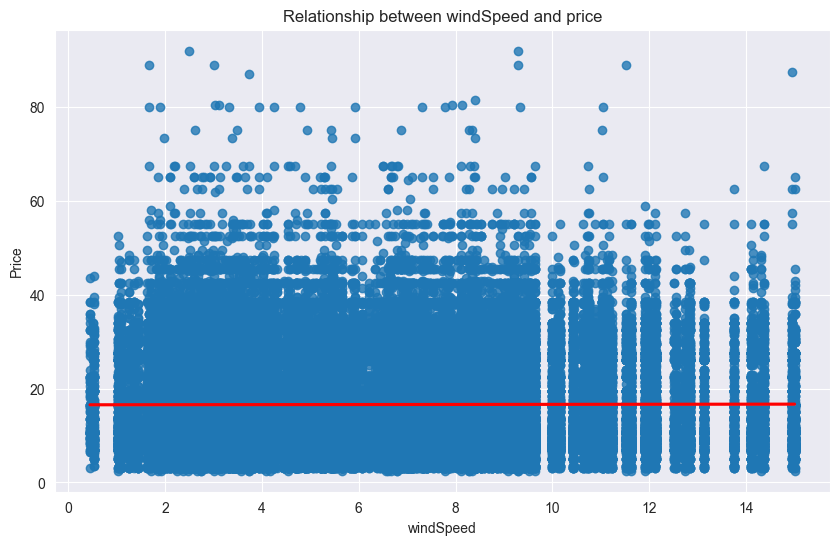

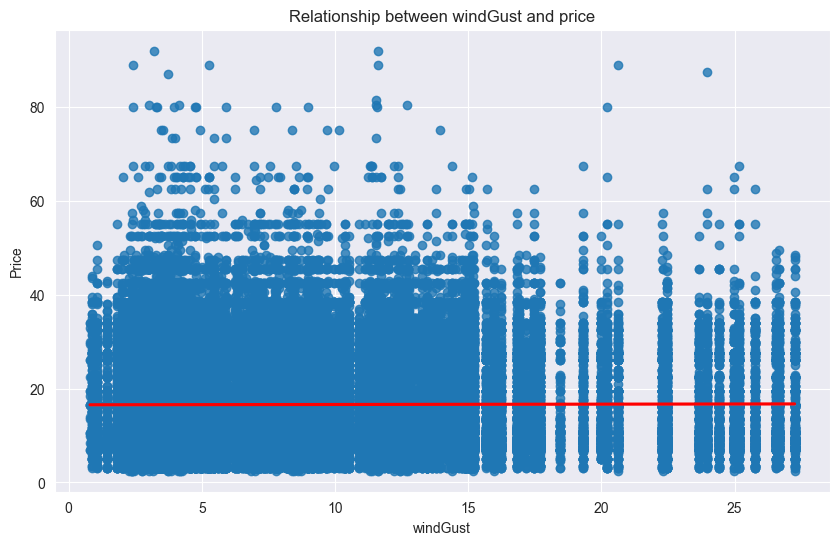

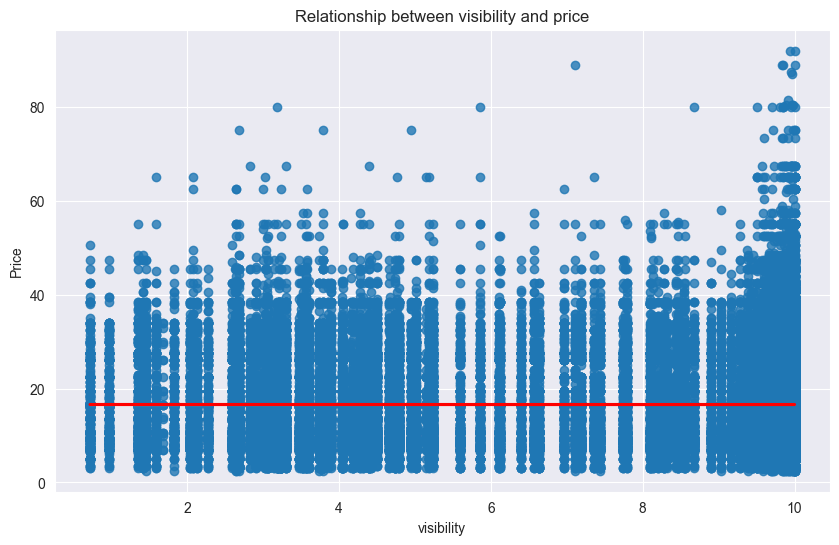

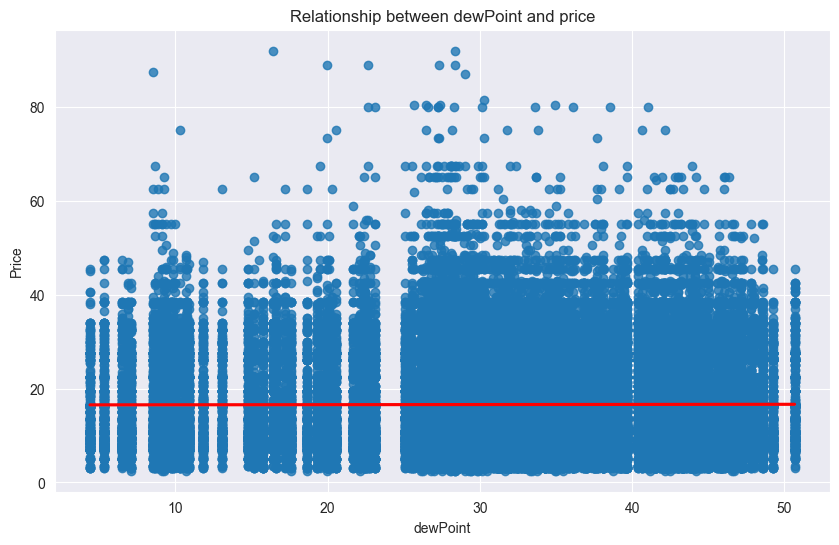

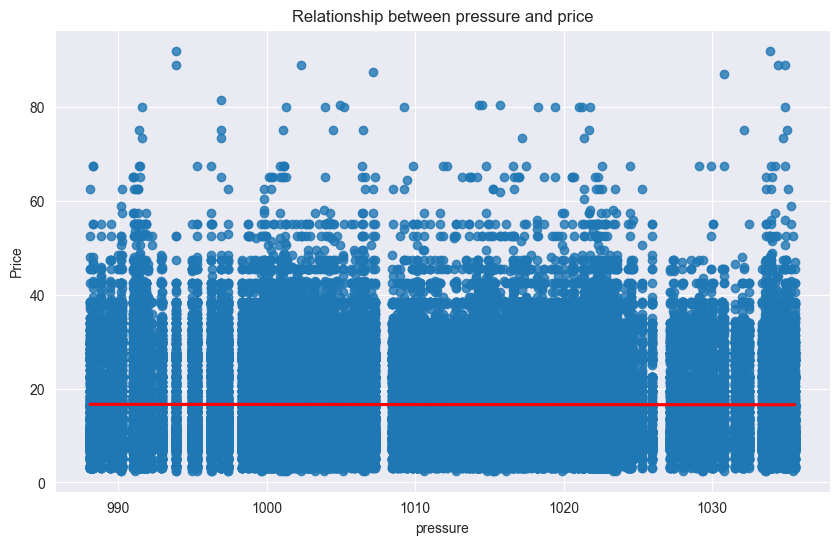

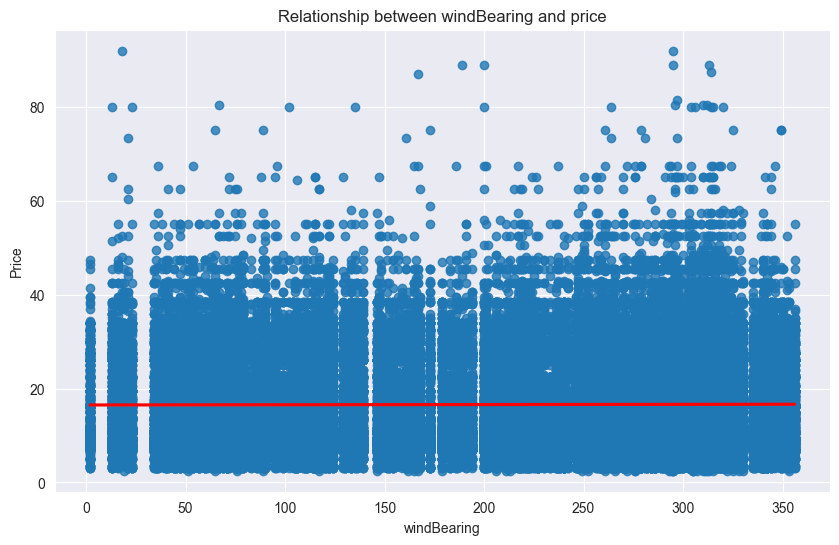

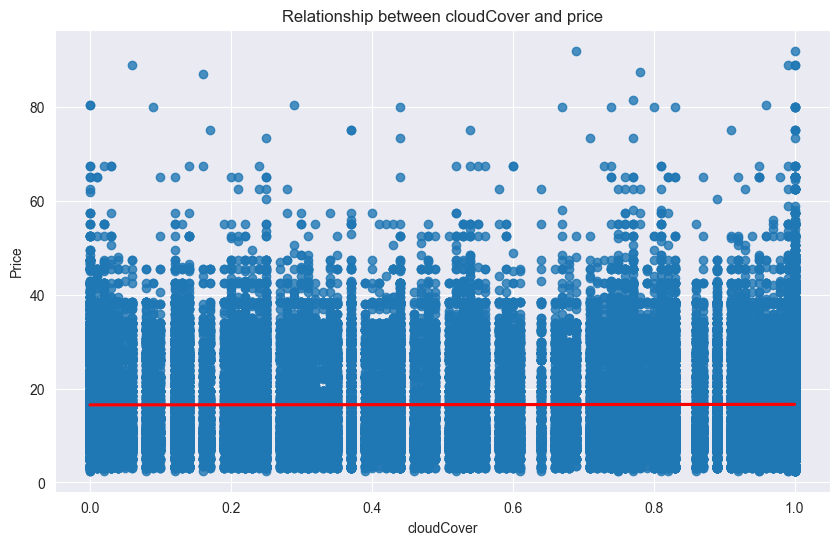

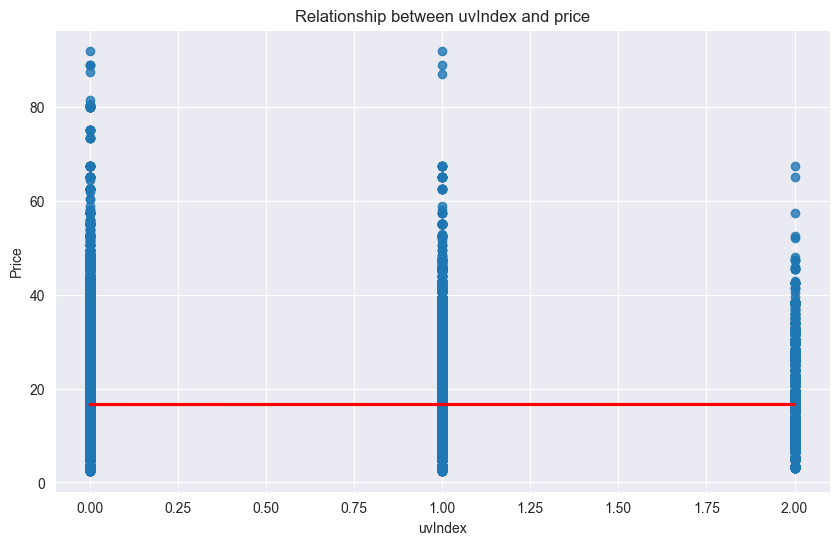

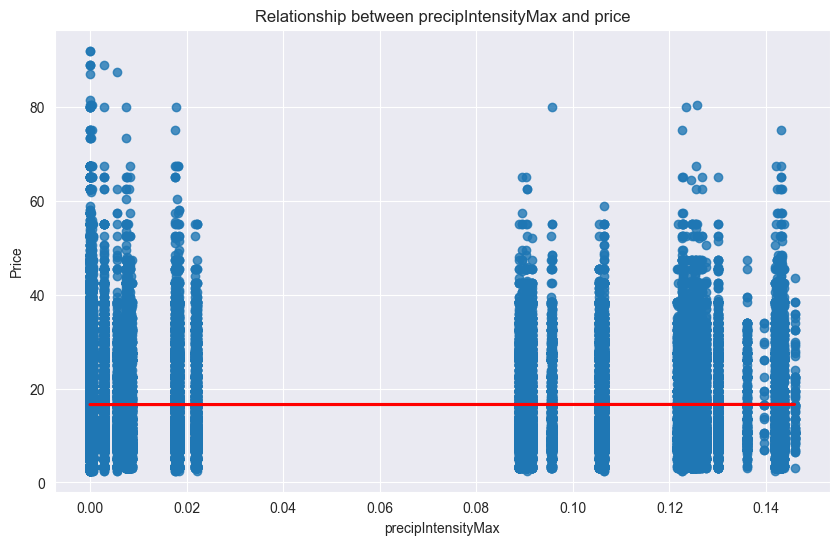

In [29]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[feature], y=data['price'], line_kws={"color":"red"})

    plt.title(f'Relationship between {feature} and price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

From the following plot it can be concluded that as the length of the trip increases, the cost of a cab ride also increases. The relationship is represented by not a straight line, but a curve. It indicates that the price of the ride is affected by other factors as well.

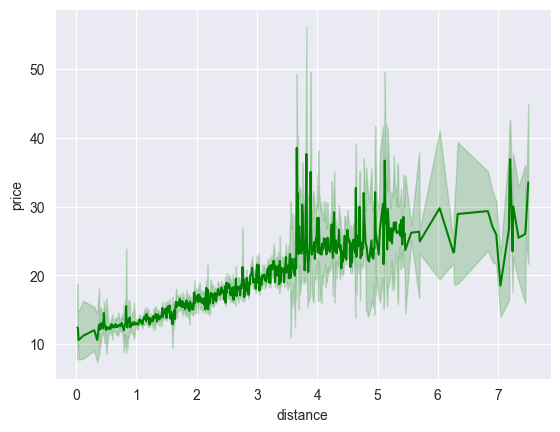

In [30]:
#plotting correlation between price and distance
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=data['distance'] , y=data['price'], color='green')
plt.show()

According to the plots above, there is no linear relationship between features and the target (price). But distance and surge multiplier features have some kind of relationship with the price. The relationship between the price and the distance is not linear, but it is more like a curve. The surge multiplier feature has a positive relationship with the price. 

The following plot demonstrated similar to linear relationships between the following features: apparent temperature and dew point, humidity and dew point, wind speed and wind gust. It is explainable by physical knowledge. Therefore, it will be better to leave apparent temperature, humidity and wind speed and remove dew point and wind gust.

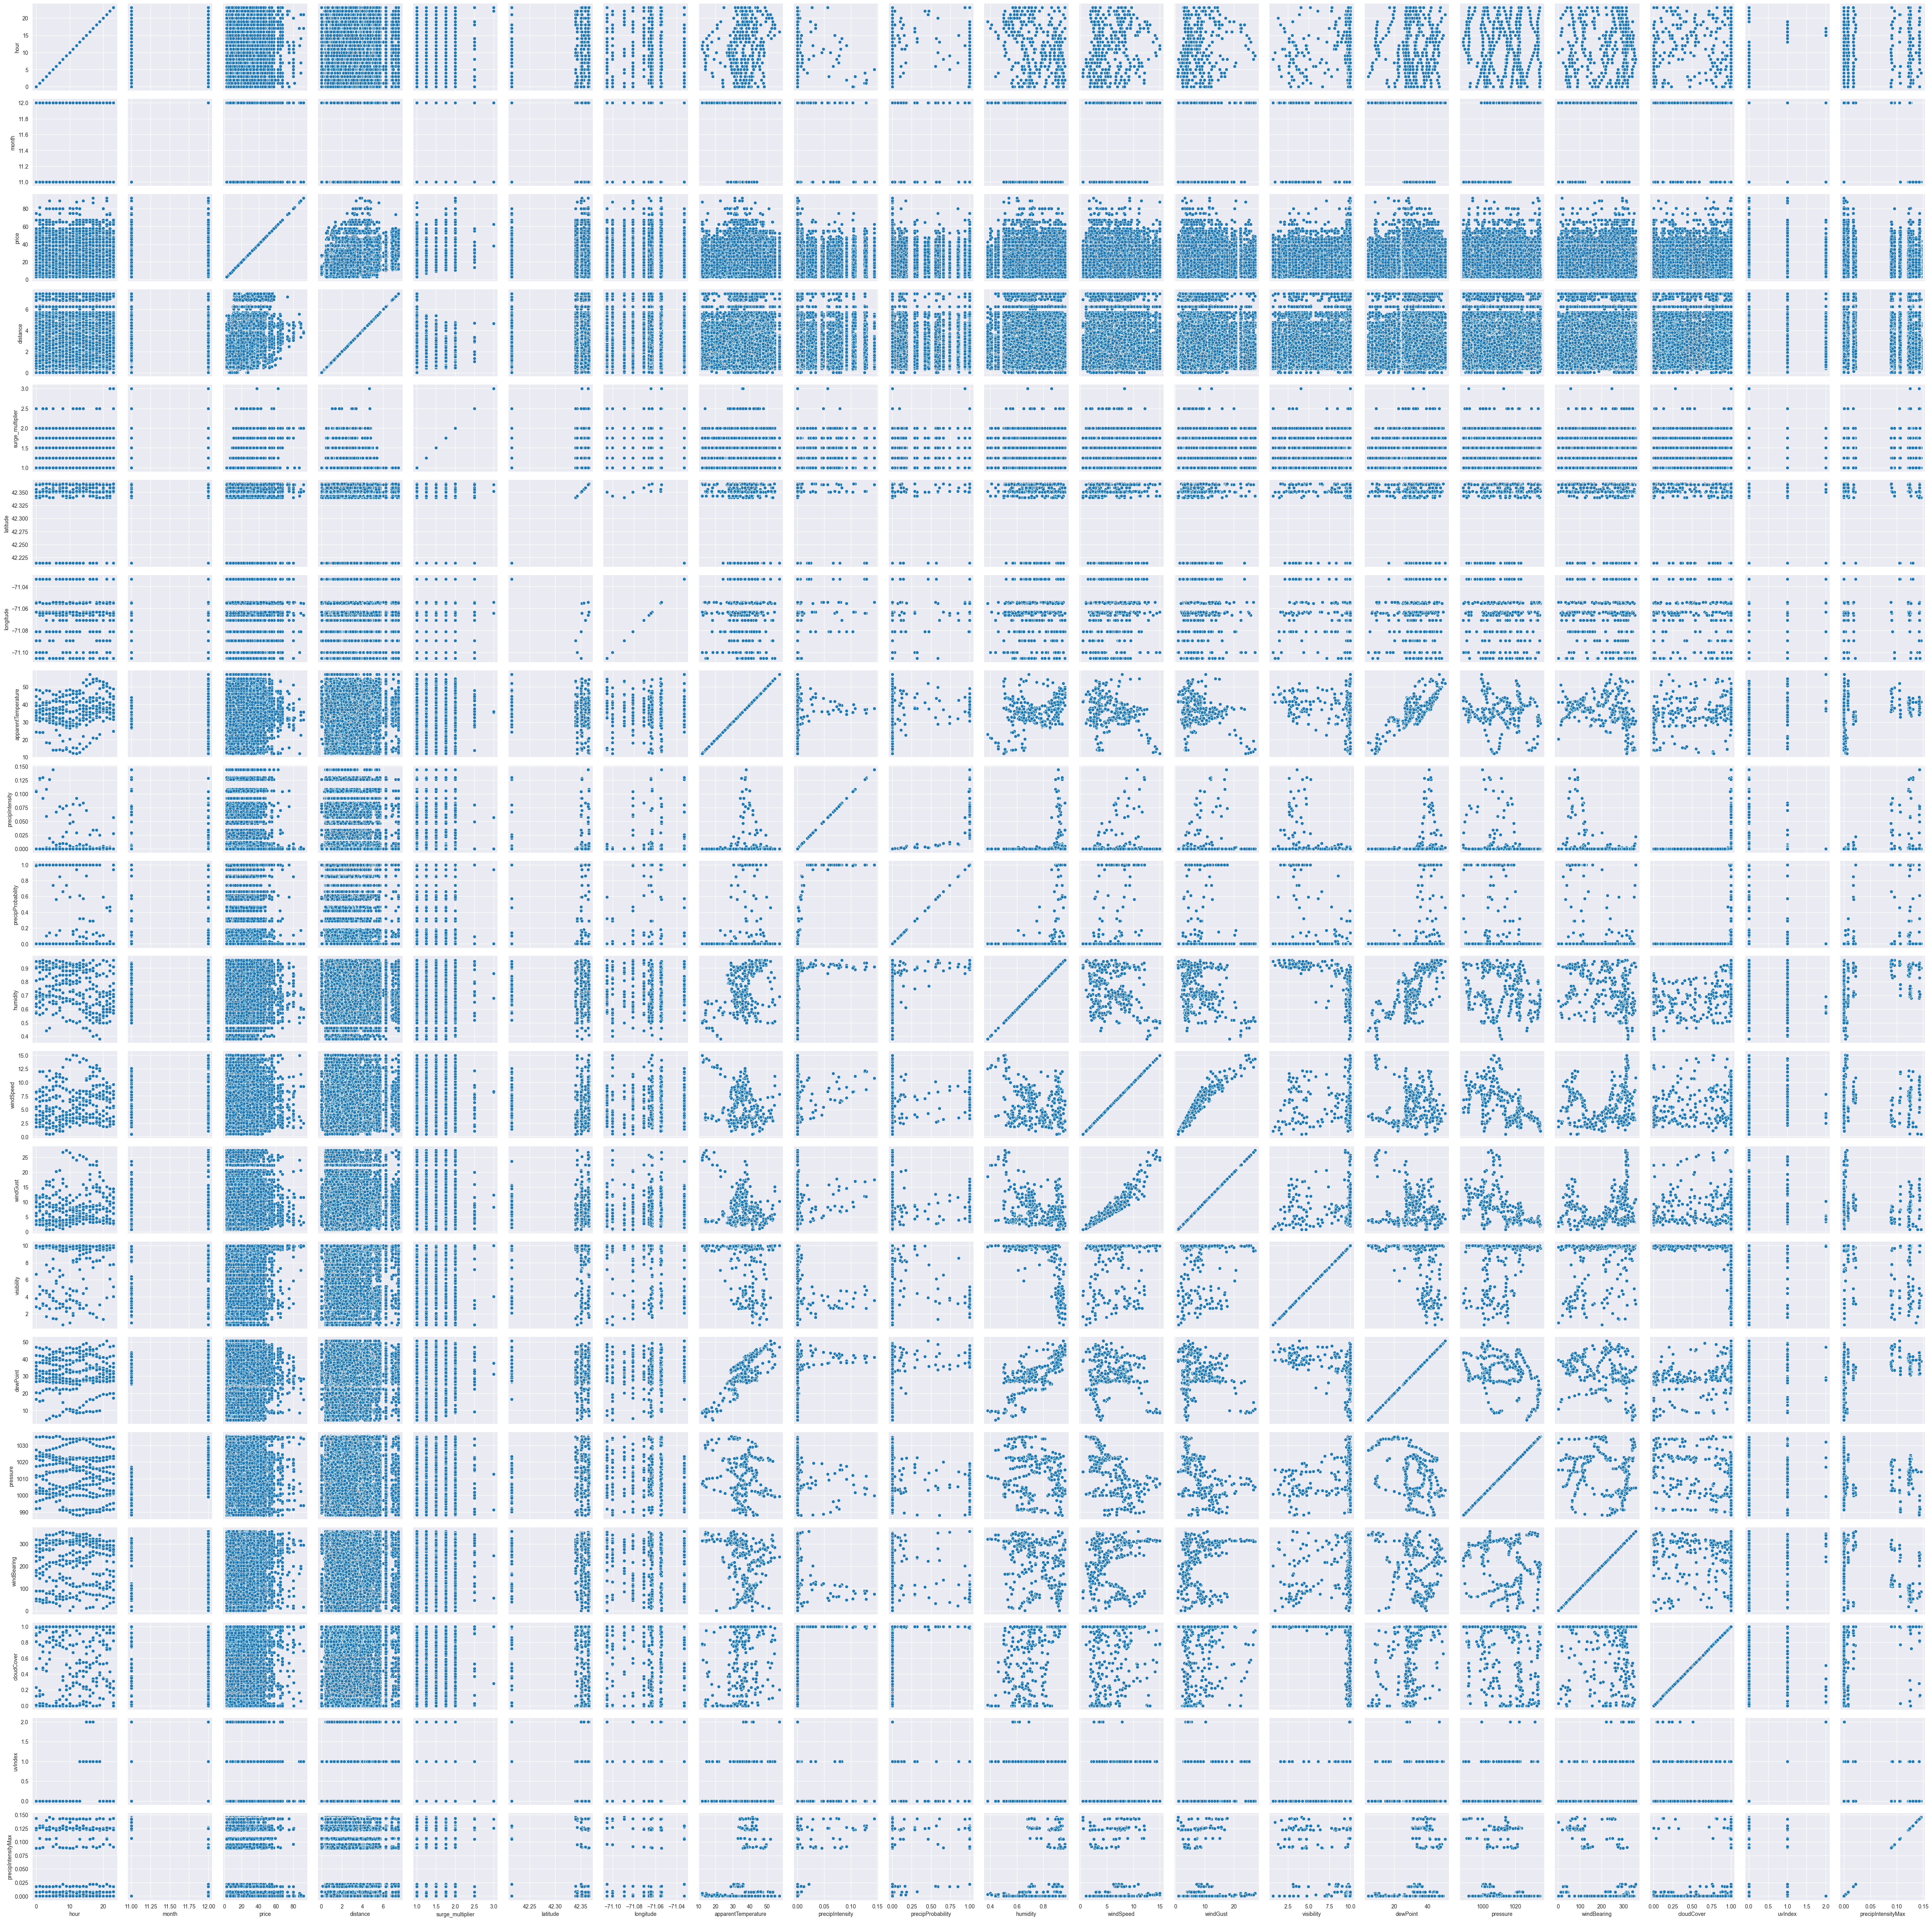

In [31]:
# Determine linear dependent features using PairGrid
g = sns.PairGrid(data.iloc[:, 1:-1])
g.map(sns.scatterplot)

In [32]:
# delete dew point and wind gust
data = data.drop(['dewPoint', 'windGust'], axis = 1)
print(f"Left columns: {list(data.columns)}")
print(len(data.columns))

Left columns: ['timestamp', 'hour', 'month', 'source', 'destination', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'day_of_week']
25


On average, the price per ride does vary much, but the graph demonstrated that it is above average at 14, 16 and 21 and well below average at 10, 15 and 19. Therefore, the hour of the day can be a good feature for the price prediction.

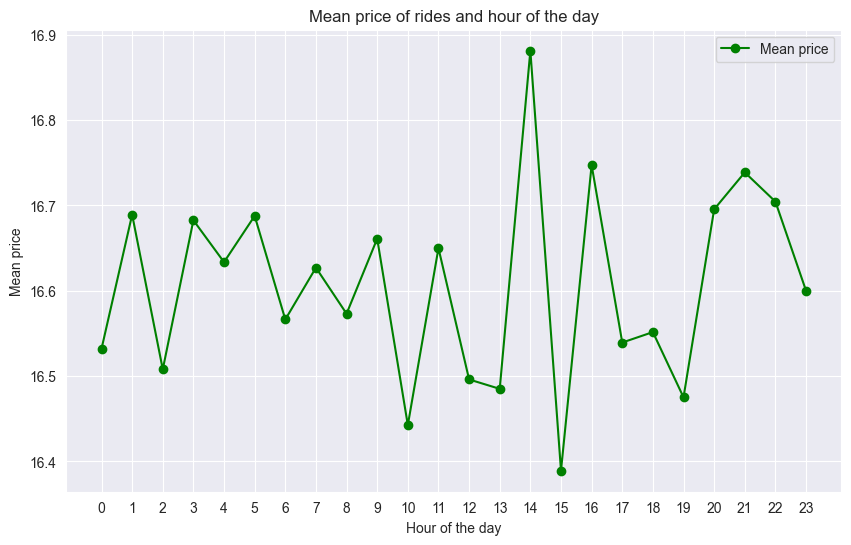

In [33]:
# analysing time
mean_prices = data.groupby('hour')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', color='green', label='Mean price')
plt.xlabel('Hour of the day')
plt.ylabel('Mean price')
plt.title('Mean price of rides and hour of the day')
plt.xticks(range(24))
plt.legend()
plt.show()


The next plot shows that the price is very different on various days of the week. Therefore, day of week may influence the price of the ride.

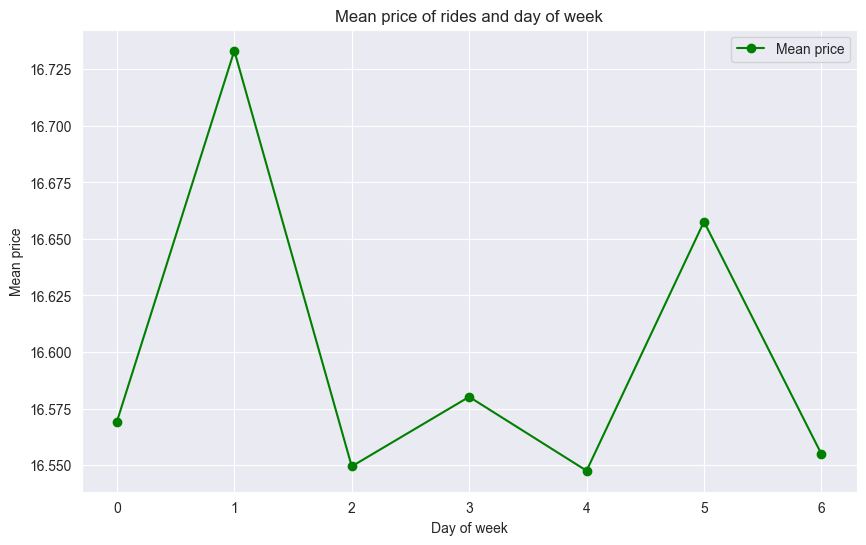

In [34]:
# analysing day of week
mean_prices = data.groupby('day_of_week')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', color='green', label='Mean price')
plt.xlabel('Day of week')
plt.ylabel('Mean price')
plt.title('Mean price of rides and day of week')
plt.xticks(range(7))
plt.legend()
plt.show()

The product id represents the id of the category of the taxi ride. The plot below shows that the price of the ride is different for different product ids. Therefore, the product id can influence the price.

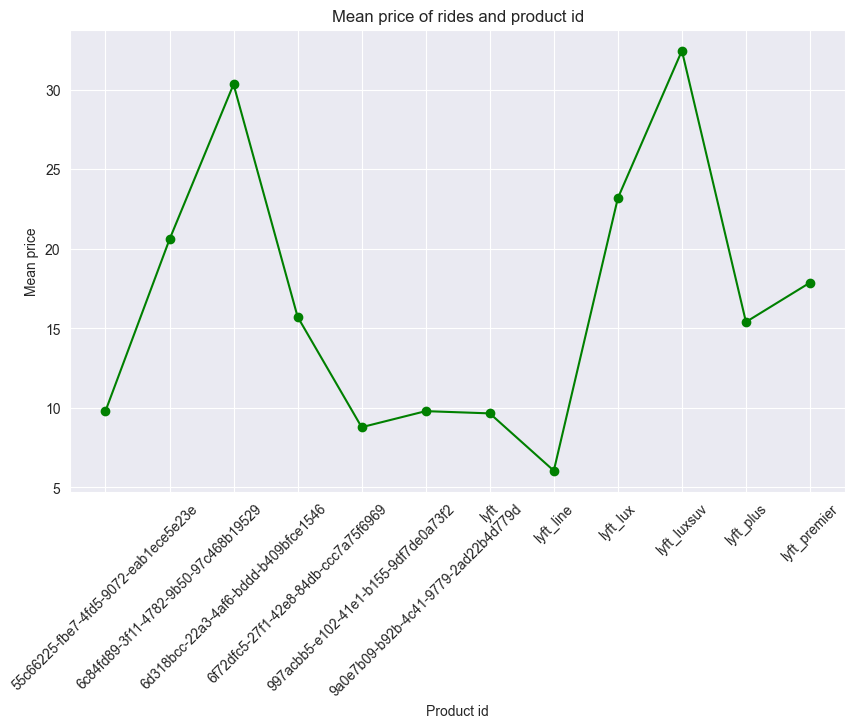

In [35]:
# examining the relationship between product_id and price
mean_prices = data.groupby('product_id')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', color='green', label='Mean price')
plt.xlabel('Product id')
plt.ylabel('Mean price')
plt.title('Mean price of rides and product id')
plt.xticks(rotation=45)
plt.show()

Name represents the category of the taxi ride. The plot below shows that the price of the ride is very different for different categories. Therefore, the name can have an impact on the price of the ride.

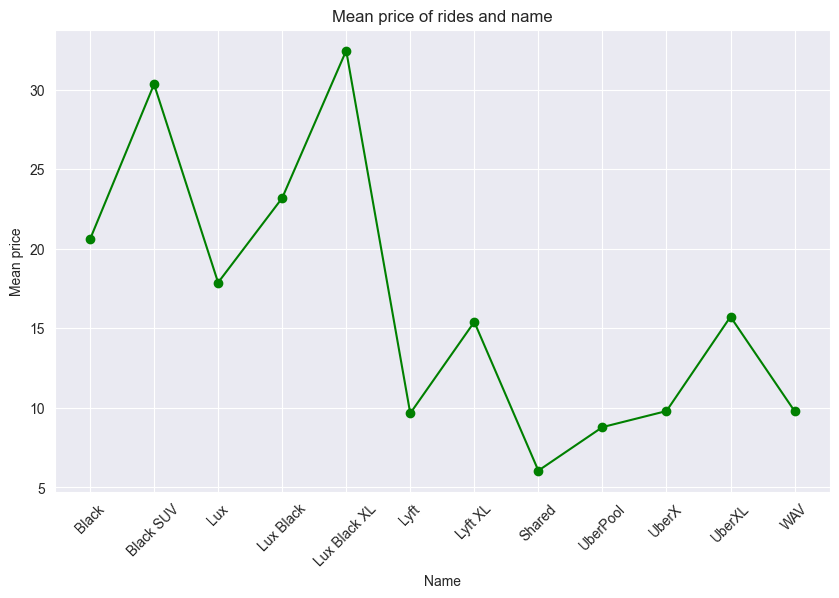

In [36]:
# examining the relationship between name and price
mean_prices = data.groupby('name')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', color='green', label='Mean price')
plt.xlabel('Name')
plt.ylabel('Mean price')
plt.title('Mean price of rides and name')
plt.xticks(rotation=45)
plt.show()

The following plot depicts that the mean price of the ride is different for various types of weather. The short summary should be included in the features set.

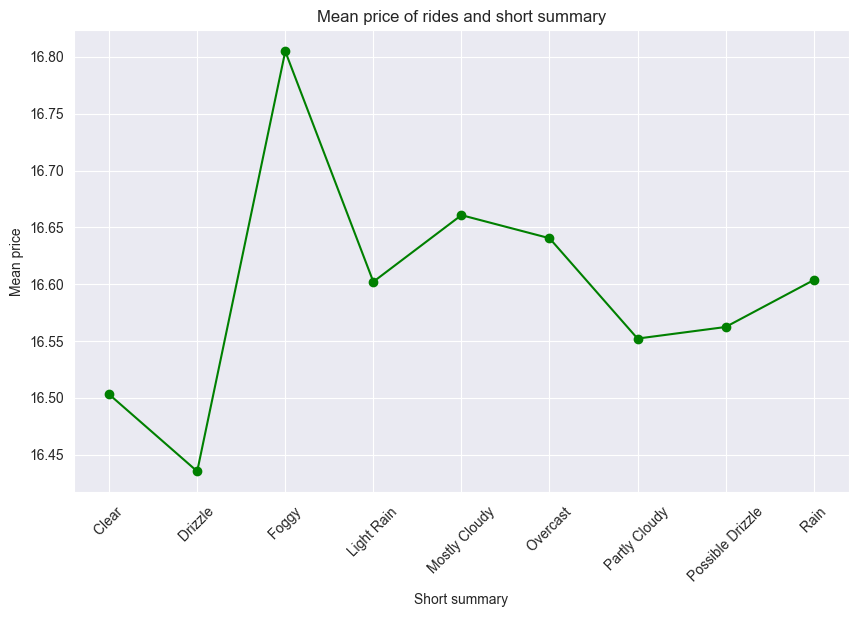

In [37]:
# examining the relationship between short_summary and price
mean_prices = data.groupby('short_summary')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(mean_prices.index, mean_prices.values, marker='o', color='green', label='Mean Price')
plt.xlabel('Short summary')
plt.ylabel('Mean price')
plt.title('Mean price of rides and short summary')
plt.xticks(rotation=45)
plt.show()

In [38]:
pd.set_option('display.max_rows', len(data['source']))
print(data.groupby(['source', 'destination'])['price'].mean())

source                   destination            
Back Bay                 Boston University          13.975922
                         Fenway                     13.889019
                         Haymarket Square           17.913966
                         North End                  19.474750
                         Northeastern University    13.117647
                         South Station              17.667623
Beacon Hill              Boston University          16.512394
                         Fenway                     16.206955
                         Haymarket Square           13.810773
                         North End                  15.297844
                         Northeastern University    16.431665
                         South Station              16.113249
Boston University        Back Bay                   13.991283
                         Beacon Hill                17.460034
                         Financial District         24.202609
                     

The following plot illustrates that the mean price of the ride is different for various source and destination points. Therefore, the source and destination points can have impact on the price of the ride.

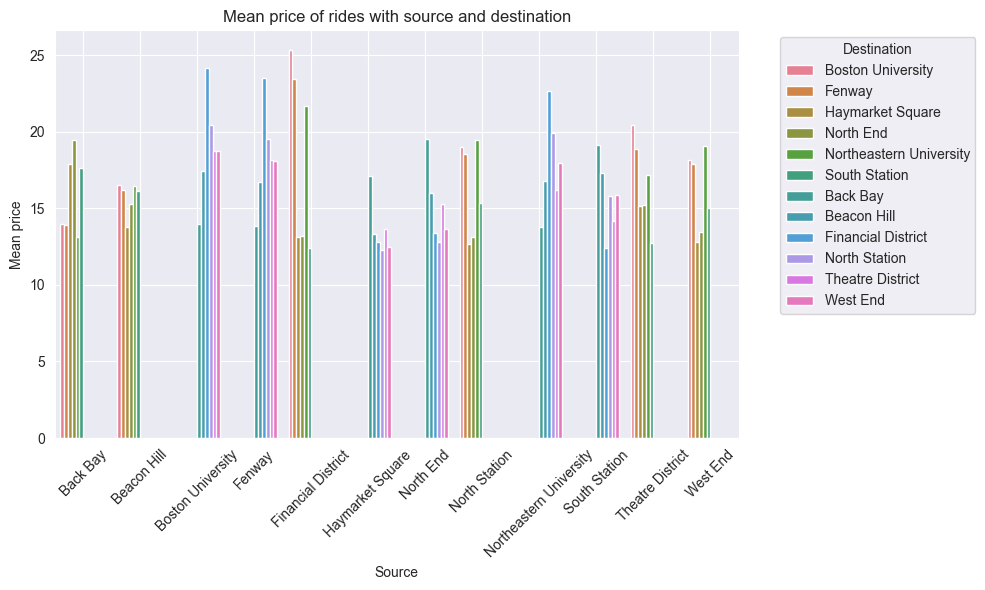

In [39]:
mean_prices = data.groupby(['source', 'destination'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='price', hue='destination', data=mean_prices)
plt.title('Mean price of rides with source and destination')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.ylabel('Mean price')
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

The price of the ride is not linearly depended on the considered features, therefore the machine lerning method that will be used should be able to capture non-linear relationships between the features and the target

#### ML methods

The following ML methods can be useful for this data:
- Linear Regression: we should try it, but according to the complex relationships between the features and the target, it may not be the best choice.
- Polynomial Regression: it can be useful because the relationship between the features and the target is not linear.
- Neural Networks: can be valuable to perform this kind of task but are not interpretable.
- Random Forest: combines the predictions of multiple decision trees that can be valuable for reducing overfitting and improving accuracy.


#### Preliminary set of features

In [40]:
print(data.columns)

Index(['timestamp', 'hour', 'month', 'source', 'destination', 'product_id',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'apparentTemperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'visibility', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax',
       'day_of_week'],
      dtype='object')


The timestamp can be removed from the preliminary set of features because there is hour, month and day of week features that are derived from that one.
 
After analysing the relationships between the weather features and the target, we decided to leave only apparent temperature and remove features precipIntensity, precipProbability, humidity, pressure, windBearing, cloudCover, uvIndex, precipIntensityMax.

Product id and name represent the same property, therefore it is better to leave only name.
Since longitude and latitude represent source point, we can remove them.

In [41]:
preliminary_features_name = ['hour', 'month', 'source', 'destination',
       'name', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'apparentTemperature', 'short_summary', 'windSpeed', 'visibility',
       'day_of_week']

For now, we decided to use this set of features. Most probably,  it will be reduced and feature engineering methods will be applied to get new more informative features (for now it is just day of week feature, but in the future the hour column can be transformed to categorical one and so on).


### Data transformations

In [42]:
X = data[preliminary_features_name]
print(X.columns)

Index(['hour', 'month', 'source', 'destination', 'name', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'apparentTemperature',
       'short_summary', 'windSpeed', 'visibility', 'day_of_week'],
      dtype='object')


In [43]:
print(X.isnull().sum())

hour                   0
month                  0
source                 0
destination            0
name                   0
distance               0
surge_multiplier       0
latitude               0
longitude              0
apparentTemperature    0
short_summary          0
windSpeed              0
visibility             0
day_of_week            0
dtype: int64


#### Encoding categorical features

The one-hot encoder will be used to transform the following categorical features because these features are nominal and have no order:
- source 
- destination 
- name (we have no information about the order of ride categories)
- short_summary 

In [44]:
# Select columns that should be encoded (values are not numbers)
features_names_to_encode = list(X.select_dtypes(exclude='number').columns)
print(features_names_to_encode)

['source', 'destination', 'name', 'short_summary']


In [45]:
from sklearn.preprocessing import OneHotEncoder

def encode_features_one_hot(dataframe, features_names, encoder):
    new_features = encoder.transform(dataframe[features_names])
    new_columns_df = pd.DataFrame(new_features, columns = encoder.get_feature_names_out(features_names))
    new_dataframe = pd.concat([dataframe.reset_index(), new_columns_df.reset_index()], axis=1)
    new_dataframe.drop(features_names, axis=1, inplace=True)
    return new_dataframe

# Encoding features
encoder = OneHotEncoder(sparse_output=False)

# Select columns that should be encoded (values are not numbers)
features_names = list(X.select_dtypes(exclude='number').columns)

encoder.fit(X[features_names])
X = encode_features_one_hot(X, features_names, encoder)

In [46]:
X.head()

index  hour  month  distance  surge_multiplier  latitude  longitude  \
0      0     9     12      0.44               1.0   42.2148    -71.033   
1      1     2     11      0.44               1.0   42.2148    -71.033   
2      2     1     11      0.44               1.0   42.2148    -71.033   
3      3     4     11      0.44               1.0   42.2148    -71.033   
4      4     3     11      0.44               1.0   42.2148    -71.033   

   apparentTemperature  windSpeed  visibility  ...  name_WAV  \
0                37.12       8.66      10.000  ...       0.0   
1                37.35      11.98       4.786  ...       0.0   
2                32.93       7.33      10.000  ...       0.0   
3                29.63       5.28      10.000  ...       0.0   
4                30.88       9.14      10.000  ...       0.0   

   short_summary_ Clear   short_summary_ Drizzle   short_summary_ Foggy   \
0                    0.0                      0.0                    0.0   
1                    0.0                      0.0                    0.0   
2                    1.0                      0.0                    0.0   
3                    1.0                      0.0                    0.0   
4                    0.0                      0.0                    0.0   

   short_summary_ Light Rain   short_summary_ Mostly Cloudy   \
0                         0.0                            1.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

   short_summary_ Overcast   short_summary_ Partly Cloudy   \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   
3                       0.0                            0.0   
4                       0.0                            1.0   

   short_summary_ Possible Drizzle   short_summary_ Rain   
0                               0.0                   0.0  
1                               0.0                   1.0  
2                               0.0                   0.0  
3                               0.0                   0.0  
4                               0.0                   0.0  

[5 rows x 57 columns]

#### Min-max scaling

In [47]:
ranges = X.describe().loc[['min', 'max']]
print(ranges)

        index  hour  month  distance  surge_multiplier  latitude  longitude  \
min       0.0   0.0   11.0      0.02               1.0   42.2148   -71.1054   
max  138613.0  23.0   12.0      7.50               3.0   42.3661   -71.0330   

     apparentTemperature  windSpeed  visibility  ...  name_WAV  \
min                12.13       0.45       0.717  ...       0.0   
max                57.22      15.00      10.000  ...       1.0   

     short_summary_ Clear   short_summary_ Drizzle   short_summary_ Foggy   \
min                    0.0                      0.0                    0.0   
max                    1.0                      1.0                    1.0   

     short_summary_ Light Rain   short_summary_ Mostly Cloudy   \
min                         0.0                            0.0   
max                         1.0                            1.0   

     short_summary_ Overcast   short_summary_ Partly Cloudy   \
min                       0.0                            0.0   
m

In [48]:
from sklearn.preprocessing import MinMaxScaler
# scaling data
scaler = MinMaxScaler()
scaler.fit(X)


X = pd.DataFrame(scaler.transform(X), columns = X.columns)
print(X.head())

      index      hour  month  distance  surge_multiplier  latitude  longitude  \
0  0.000000  0.391304    1.0   0.05615               0.0       0.0        1.0   
1  0.000007  0.086957    0.0   0.05615               0.0       0.0        1.0   
2  0.000014  0.043478    0.0   0.05615               0.0       0.0        1.0   
3  0.000022  0.173913    0.0   0.05615               0.0       0.0        1.0   
4  0.000029  0.130435    0.0   0.05615               0.0       0.0        1.0   

   apparentTemperature  windSpeed  visibility  ...  name_WAV  \
0             0.554225   0.564261    1.000000  ...       0.0   
1             0.559326   0.792440    0.438328  ...       0.0   
2             0.461300   0.472852    1.000000  ...       0.0   
3             0.388113   0.331959    1.000000  ...       0.0   
4             0.415835   0.597251    1.000000  ...       0.0   

   short_summary_ Clear   short_summary_ Drizzle   short_summary_ Foggy   \
0                    0.0                      0.0   

## Data quality verification

### Missing values

There are no missing values in feature columns (initially price column had missing values, but it is target, therefore rows with missing values were removed).
Since there are no missing values in the feature columns, we will not impute them.
The quality of the data is good, since there are no missing values in the feature columns and  there are enough informative features. The data could be better it contained more months, because the price of the ride can be affected by the season, but we have only 2 months (November and December).

Data cleaning is already done.

In [49]:
# number of missing values per feature

print(X.isnull().sum())

index                                  0
hour                                   0
month                                  0
distance                               0
surge_multiplier                       0
latitude                               0
longitude                              0
apparentTemperature                    0
windSpeed                              0
visibility                             0
day_of_week                            0
index                                  0
source_Back Bay                        0
source_Beacon Hill                     0
source_Boston University               0
source_Fenway                          0
source_Financial District              0
source_Haymarket Square                0
source_North End                       0
source_North Station                   0
source_Northeastern University         0
source_South Station                   0
source_Theatre District                0
source_West End                        0
destination_Back

In [50]:
missing_values_columns = list(X.columns[X.isnull().any()])
print('Columns with missing values: ', missing_values_columns)

Columns with missing values:  []


### Data requirements


In [53]:
from great_expectations.data_context import FileDataContext
# Create a data context
context = FileDataContext(context_root_dir="../services/gx")

# Add a pandas datasource
ds = context.sources.add_or_update_pandas(name="pandas_datasource")

# Add a CSV asset
da1 = ds.add_csv_asset(
        name="csv_file",
        filepath_or_buffer="../data/samples/sample.csv"
)

# Build a batch request
batch_request = da1.build_batch_request()

# Create an expectation suite
context.add_or_update_expectation_suite("initial_data_validation")
validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="initial_data_validation"
)

# Validations

# id: unique, not null, pattern of UUID
validator.expect_column_values_to_not_be_null("id")
validator.expect_column_values_to_be_unique("id")
validator.expect_column_values_to_match_regex("id",
                                              r"^[0-9a-fA-F]{8}-[0-9a-fA-F]{4}-[1-5][0-9a-fA-F]{3}-[89abAB][0-9a-fA-F]{3}-[0-9a-fA-F]{12}$")

# price: not null, >0, is of type float
validator.expect_column_values_to_be_between("price", min_value=0, max_value=None, strict_min=True)
validator.expect_column_values_to_be_of_type("price", "float")

# distance: not null, >0, is of type float
validator.expect_column_values_to_not_be_null("distance")
validator.expect_column_values_to_be_between("distance", min_value=0, max_value=None, strict_min=True)
validator.expect_column_values_to_be_of_type("distance", "float")

# datetime: not null, format, min value
validator.expect_column_values_to_not_be_null("datetime")
validator.expect_column_values_to_match_strftime_format("datetime", "%Y-%m-%d %H:%M:%S")
validator.expect_column_values_to_be_between("datetime", min_value="2018-11-26 00:00:00", max_value=None)

# hour: not null, 0 to 24, is of type int
validator.expect_column_values_to_not_be_null("hour")
validator.expect_column_values_to_be_between("hour", 0, 24)
validator.expect_column_values_to_be_of_type("hour", "int")

# day: not null, 1 to 31, is of type int
validator.expect_column_values_to_not_be_null("day")
validator.expect_column_values_to_be_between("day", 1, 31)
validator.expect_column_values_to_be_of_type("day", "int")

# month: not null, 1 to 12, is of type int
validator.expect_column_values_to_not_be_null("month")
validator.expect_column_values_to_be_between("month", 1, 12)
validator.expect_column_values_to_be_of_type("month", "int")

# cab_type: not null, in set of values {Lyft, Uber}
validator.expect_column_values_to_be_in_set("cab_type", {"Lyft", "Uber"})
validator.expect_column_values_to_not_be_null("cab_type")

results = validator.validate()

if not results.success:
    failed_expectations = [
        (result.expectation_config.expectation_type, result.result)
        for result in results.results
        if not result.success
    ]
    raise AssertionError(f"Data validation failed: {failed_expectations}")

print("All data validations passed.")

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/56 [00:00<?, ?it/s]

All data validations passed.
